In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [3]:
data= pd.read_csv('/data/Good data_store.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35,36",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [4]:
cd /data

/data


### Figure: PPR and Age relationship

In [5]:
data['IS100'].value_counts()

1    103
2     55
0      4
Name: IS100, dtype: int64

Given that we have most data in isi=100 ms, we will use this to illustrate the relationship between PPR and Age

In [6]:
data_is100_ie = data[(data['IS100']==1)&(data['E-I']==0)]
data_is100_ei = data[(data['IS100']==1)&(data['E-I']==1)]

In [7]:
# data_is100[data_is100['Age'] == 32]

In [8]:
data_is100_ei['Age'].value_counts().sort_index()

22     4
23     6
24     5
25     8
26     6
27     9
28     9
29    10
30    10
31     5
32     3
33     1
34     5
35     4
Name: Age, dtype: int64

In [9]:
# Obtain the sorted age index
age_idx_ei = data_is100_ei['Age'].value_counts().sort_index().index
age_idx_ie = data_is100_ie['Age'].value_counts().sort_index().index

In [10]:
# Process all the before trial
isi=1   # Use only the 100 ms
trial_output = {}

for i in range(len(age_idx_ei)):
    data_tmp =  data_is100_ei[data_is100_ei['Age'] == age_idx_ei[i]]
    PPR = []
    rs = []
    ir = []
    amp1 = []
    for j in range(len(data_tmp)):
        test_name = 'test'+ data_tmp['File name'].iloc[j].astype(str)
        test_data = sio.loadmat(test_name)
        test_pip = data_tmp.iloc[j]['Pip number']
        test_trace_idx = data_tmp.iloc[j]['Trial number before']
        ifartifact = data_tmp.iloc[j]['Artifact']
        bef_index = [int(s)-1 for s in str.split(test_trace_idx, ',')]
        trial_output[data_tmp['File name'].iloc[j].astype(str)]= patch_pip.sing_trial_ana(trial=test_data['test'][0], index=bef_index, isi=isi,test_pip=test_pip, ifartifact=ifartifact, ave_len=3, iffigure=0)
        
short_data = pd.DataFrame(trial_output).transpose()
short_data.to_pickle('short_term_plasticity_EI')

In [11]:
# Process all the before trial
isi=1   # Use only the 100 ms
trial_output = {}

for i in range(len(age_idx_ie)):
    data_tmp =  data_is100_ie[data_is100_ie['Age'] == age_idx_ie[i]]
    PPR = []
    rs = []
    ir = []
    amp1 = []
    for j in range(len(data_tmp)):
        test_name = 'test'+ data_tmp['File name'].iloc[j].astype(str)
        test_data = sio.loadmat(test_name)
        test_pip = data_tmp.iloc[j]['Pip number']
        test_trace_idx = data_tmp.iloc[j]['Trial number before']
        bef_index = [int(s)-1 for s in str.split(test_trace_idx, ',')]
        trial_output[data_tmp['File name'].iloc[j].astype(str)]= patch_pip.sing_trial_ana(trial=test_data['test'][0], index=bef_index, isi=isi,test_pip=test_pip, ave_len=3, iffigure=0)
        
short_data = pd.DataFrame(trial_output).transpose()
short_data.to_pickle('short_term_plasticity_IE')

/src/Patch_ana/Patch_ana/patch_pip.py:330: RuntimeWarning: Mean of empty slice
  output['onset_tau'] = np.nanmean(onset_tau)
/src/Patch_ana/Patch_ana/patch_pip.py:331: RuntimeWarning: Mean of empty slice
  output['decay_tau'] = np.nanmean(decay_tau)


In [12]:
short_data_ei = pd.read_pickle('short_term_plasticity_EI')
short_data_ie = pd.read_pickle('short_term_plasticity_IE')

In [13]:
short_data_ei.head()

,PPR,ave_all,ave_amp1,ave_amp2,decay_tau,ir,onset_tau,raw_amp1,raw_amp2,resp1_region,resp2_region,rs,x
2016072902,"[[1.28876282667], [1.39348695847], [1.38344771...","[[5.47929210672e-11, 8.77189607397e-11, 1.2064...","[[9.75319952337e-11], [8.34325453411e-11], [7....","[[1.25695609868e-10], [1.16262163845e-10], [1....",1.4699,"[[53.3280247898], [53.034127662], [50.90761215...",0.56,"[1.08866192831e-10, 1.17820711618e-10, 5.91192...","[1.48062284732e-10, 1.36356827441e-10, 8.52999...","[12502, 12503, 12504, 12505, 12506, 12507, 125...","[15032, 15033, 15034, 15035, 15036, 15037, 150...","[[22.0777154188], [21.8323005667], [22.1205637...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2016081703,"[[1.53338860462], [2.09275010931], [3.06788668...","[[4.49815732432e-13, 6.22979368015e-14, 2.9838...","[[3.973423254e-11], [3.54617697244e-11], [2.20...","[[6.09280193903e-11], [7.42126224671e-11], [6....",2.57062,"[[78.4083615685], [72.9411998598], [75.2715301...",0.5575,"[4.25538736038e-11, 1.35087758433e-11, 7.36519...","[1.03552384228e-10, 7.8100022381e-11, 2.753733...","[12502, 12503, 12504, 12505, 12506, 12507, 125...","[15032, 15033, 15034, 15035, 15036, 15037, 150...","[[29.6852383834], [31.5029724442], [32.8214736...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2016091201,"[[1.20672641583], [2.65389660155], [1.00702368...","[[9.04581213349e-13, 8.2921649888e-13, 7.34662...","[[3.24286537795e-11], [1.76171132044e-11], [4....","[[3.91325131454e-11], [4.67539968623e-11], [4....",2.50803,"[[97.848730215], [90.1787339449], [88.45998071...",0.563077,"[2.87252717053e-11, 7.0065117172e-11, 3.384681...","[6.21767208707e-11, 1.6219564626e-11, 4.630605...","[12502, 12503, 12504, 12505, 12506, 12507, 125...","[15032, 15033, 15034, 15035, 15036, 15037, 150...","[[25.2396445268], [24.7783443862], [24.7792607...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"
2016092901,"[[0.652953942162], [0.574974729772], [0.647854...","[[4.94096504618e-12, 6.66442808513e-12, 8.2586...","[[1.07267983432e-10], [1.16351289957e-10], [1....","[[7.004105265e-11], [6.6899051502e-11], [6.909...",4.89602,"[[90.9907171666], [96.2559280158], [97.1503028...",0.862857,"[9.81292234716e-11, 1.19288831711e-10, 8.78765...","[5.59295205257e-11, 4.99437717122e-11, 1.03026...","[12502, 12503, 12504, 12505, 12506, 12507, 125...","[15032, 15033, 15034, 15035, 15036, 15037, 150...","[[13.4193275723], [13.3697251428], [13.4760541...","[1, 2, 3, 4, 5, 6, 7]"
2016092903,"[[3.88297265591], [1.21698428507], [0.69620254...","[[3.48331639225e-12, 3.1360443041e-11, 6.48939...","[[1.40734837352e-11], [4.6117754899e-11], [7.9...","[[5.46469525171e-11], [5.61245829749e-11], [5....",1.44692,"[[74.0944489332], [77.6152729596], [78.5501702...",0.56,"[nan, 1.78216157756e-11, nan, nan, 5.016984863...","[6.24588229616e-11, 5.03416393448e-11, 5.59592...","[12502, 12503, 12504, 12505, 12506, 12507, 125...","[15032, 15033, 15034, 15035, 15036, 15037, 150...","[[19.6673233592], [19.5035903627], [19.4625362...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [14]:
# Combined analysis
PPR_ei_mean = np.zeros(len(age_idx_ei))
PPR_ei_std = np.zeros(len(age_idx_ei))
onset_ei_mean = np.zeros(len(age_idx_ei))
onset_ei_std = np.zeros(len(age_idx_ei))
decay_ei_mean = np.zeros(len(age_idx_ei))
decay_ei_std = np.zeros(len(age_idx_ei))

for i in range(len(age_idx_ei)):
    data_tmp =  data_is100_ei[data_is100_ei['Age'] == age_idx_ei[i]]
    PPR = []
    rs = []
    ir = []
    amp1 = []
    onset = []
    decay = []
    for j in range(len(data_tmp)):
        test_name = data_tmp['File name'].iloc[j]
        trial_tmp = short_data_ei.loc[str(test_name)]
        PPR.append(np.nanmean(trial_tmp['PPR']))
        rs.append(trial_tmp['rs'])
        ir.append(trial_tmp['ir'])
        amp1.append(trial_tmp['ave_all'])
        onset.append(trial_tmp['onset_tau'])
        decay.append(trial_tmp['decay_tau'])
     
    decay_ei_mean[i] = np.nanmean(decay)
    decay_ei_std[i] = np.nanstd(decay)/np.sqrt(len(PPR))
    onset_ei_mean[i] = np.nanmean(onset)
    onset_ei_std[i] = np.nanstd(onset)/np.sqrt(len(PPR))
    PPR_ei_mean[i] = np.nanmean(PPR)
    PPR_ei_std[i] = np.nanstd(PPR)/np.sqrt(len(PPR))

In [15]:
# Combined analysis
PPR_ie_mean = np.zeros(len(age_idx_ie))
PPR_ie_std = np.zeros(len(age_idx_ie))
onset_ie_mean = np.zeros(len(age_idx_ie))
onset_ie_std = np.zeros(len(age_idx_ie))
decay_ie_mean = np.zeros(len(age_idx_ie))
decay_ie_std = np.zeros(len(age_idx_ie))

for i in range(len(age_idx_ie)):
    data_tmp =  data_is100_ie[data_is100_ie['Age'] == age_idx_ie[i]]
    PPR = []
    rs = []
    ir = []
    onset = []
    decay = []
    for j in range(len(data_tmp)):
        test_name = data_tmp['File name'].iloc[j]
        trial_tmp = short_data_ie.loc[str(test_name)]
        PPR.append(np.nanmean(trial_tmp['PPR']))
        rs.append(trial_tmp['rs'])
        ir.append(trial_tmp['ir'])
        onset.append(trial_tmp['onset_tau'])
        decay.append(trial_tmp['decay_tau'])
        amp1.append(trial_tmp['ave_all'])
    
    decay_ie_mean[i] = np.nanmean(decay)
    decay_ie_std[i] = np.nanstd(decay)/np.sqrt(len(PPR))
    onset_ie_mean[i] = np.nanmean(onset)
    onset_ie_std[i] = np.nanstd(onset)/np.sqrt(len(PPR))
    PPR_ie_mean[i] = np.nanmean(PPR)
    PPR_ie_std[i] = np.nanstd(PPR)/np.sqrt(len(PPR))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice


In [16]:
# Perform linear regression on the PPR mean
show_len_ei = np.concatenate((np.arange(0,len(age_idx_ei)-3), np.array([len(age_idx_ei)-2,len(age_idx_ei)-1])))
show_len_ie = np.arange(1,len(age_idx_ie)-1)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(age_idx_ei[show_len_ei],PPR_ei_mean[show_len_ei])

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


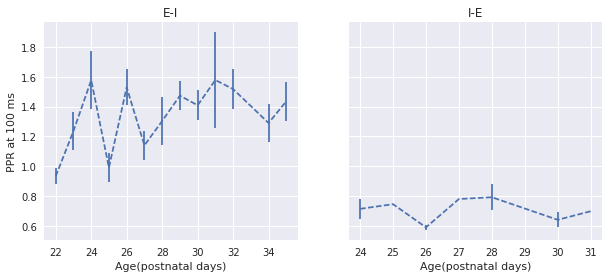

In [17]:
# plt.plot(age_idx[show_len], slope * age_idx[show_len] + intercept, 'g', alpha=0.4, label='p=%.3f'%p_value)
fig, ax = plt.subplots(1,2,sharey=True)
fig.set_figwidth(10)
ax[0].errorbar(x=age_idx_ei[show_len_ei], y=PPR_ei_mean[show_len_ei], yerr=PPR_ei_std[show_len_ei], fmt='--')
ax[1].errorbar(x=age_idx_ie[show_len_ie], y=PPR_ie_mean[show_len_ie], yerr=PPR_ie_std[show_len_ie], fmt='--')
ax[0].legend(loc='upper left')
ax[0].set_title('E-I')
ax[1].set_title('I-E')
ax[0].set_xlabel('Age(postnatal days)')
ax[1].set_xlabel('Age(postnatal days)')
ax[0].set_ylabel('PPR at 100 ms')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


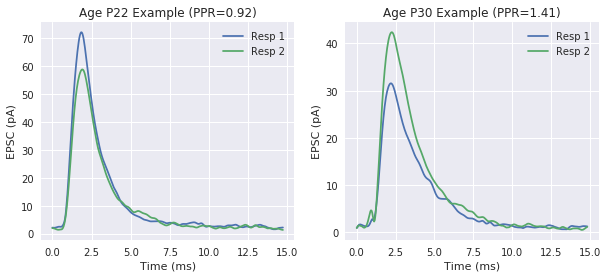

In [18]:
# Visualize example trace between paired pulse facilitation and depression
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)

data_is100_age22 = data_is100_ei[data_is100_ei['Age'] == 22].iloc[2]
name_tmp = data_is100_age22['File name']
trace = np.mean(short_data_ei.loc[str(name_tmp)]['ave_all'], axis=0)
x_resp1 = np.arange(len(trace[short_data_ei.loc[str(name_tmp)]['resp1_region'][31:400]]))/25
ax[0].plot(x_resp1,trace[short_data_ei.loc[str(name_tmp)]['resp1_region'][31:400]] * 1e12, label='Resp 1')
ax[0].plot(x_resp1,trace[short_data_ei.loc[str(name_tmp)]['resp2_region'][:len(x_resp1)]]* 1e12, label='Resp 2')
ax[0].legend()
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('EPSC (pA)')
ax[0].set_title('Age P22 Example (PPR=%0.2f)'%(np.nanmean(short_data_ei.loc[str(name_tmp)]['PPR'])))

data_is100_age22 = data_is100_ei[data_is100_ei['Age'] == 30].iloc[4]

name_tmp = data_is100_age22['File name']
trace = np.mean(short_data_ei.loc[str(name_tmp)]['ave_all'], axis=0)
x_resp1 = np.arange(len(trace[short_data_ei.loc[str(name_tmp)]['resp1_region'][28:400]]))/25
ax[1].plot(x_resp1,trace[short_data_ei.loc[str(name_tmp)]['resp1_region'][28:400]] * 1e12, label='Resp 1')
ax[1].plot(x_resp1,trace[short_data_ei.loc[str(name_tmp)]['resp2_region'][:len(x_resp1)]]* 1e12, label='Resp 2')
ax[1].legend()
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('EPSC (pA)')
ax[1].set_title('Age P30 Example (PPR=%0.2f)'%(np.nanmean(short_data_ei.loc[str(name_tmp)]['PPR'])))

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


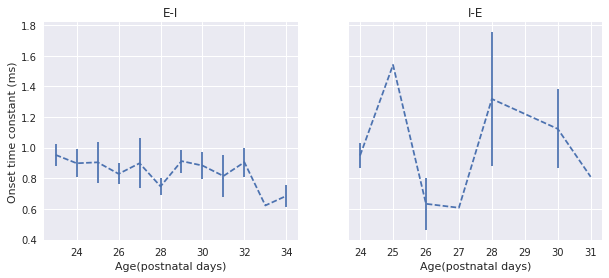

In [21]:
# plt.plot(age_idx[show_len], slope * age_idx[show_len] + intercept, 'g', alpha=0.4, label='p=%.3f'%p_value)
show_len_ei = np.arange(1,len(age_idx_ei)-1)
show_len_ie = np.arange(1,len(age_idx_ie)-1)

fig, ax = plt.subplots(1,2,sharey=True)
fig.set_figwidth(10)
ax[0].errorbar(x=age_idx_ei[show_len_ei], y=onset_ei_mean[show_len_ei], yerr=onset_ei_std[show_len_ei], fmt='--')
ax[1].errorbar(x=age_idx_ie[show_len_ie], y=onset_ie_mean[show_len_ie], yerr=onset_ie_std[show_len_ie], fmt='--')
ax[0].legend(loc='upper left')
ax[0].set_title('E-I')
ax[1].set_title('I-E')
ax[0].set_xlabel('Age(postnatal days)')
ax[1].set_xlabel('Age(postnatal days)')
ax[0].set_ylabel('Onset time constant (ms)')

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


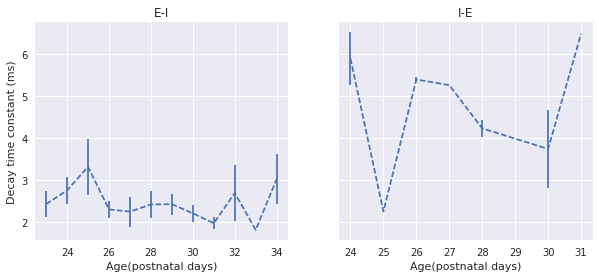

In [22]:
# plt.plot(age_idx[show_len], slope * age_idx[show_len] + intercept, 'g', alpha=0.4, label='p=%.3f'%p_value)
fig, ax = plt.subplots(1,2,sharey=True)
fig.set_figwidth(10)
ax[0].errorbar(x=age_idx_ei[show_len_ei], y=decay_ei_mean[show_len_ei], yerr=decay_ei_std[show_len_ei], fmt='--')
ax[1].errorbar(x=age_idx_ie[show_len_ie], y=decay_ie_mean[show_len_ie], yerr=decay_ie_std[show_len_ie], fmt='--')
ax[0].legend(loc='upper left')
ax[0].set_title('E-I')
ax[1].set_title('I-E')
ax[0].set_xlabel('Age(postnatal days)')
ax[1].set_xlabel('Age(postnatal days)')
ax[0].set_ylabel('Decay time constant (ms)')